# Advanced Python for Data Science 
## Final Project
## Sentiment Analysis of Acrimonious Tweets using NLP
## Team 3 - Vivek, Anshul, Mayank

### 1. Data Loading and Data Cleaning:

In [1]:
"""
Importing some useful librarires
"""
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# tweets_USA = pd.read_excel('tweets_1.xlsx')

In [2]:
"""
Loading the master tweets file
"""
tweets_USA = pd.read_csv('tweets.csv', encoding = 'ISO-8859-1', error_bad_lines=False)

In [3]:
"""
Taking a look at the file
"""
tweets_USA = pd.DataFrame(tweets_USA)

print (tweets_USA.head())
# print (tweets_USA.columns)

                       created_at  tweet_id_OLD   user_id_OLD  \
0  Wed Apr 25 20:24:53 +0000 2018  7.690000e+17  7.690000e+17   
1  Wed Apr 25 20:24:54 +0000 2018  9.890000e+17  9.890000e+17   
2  Wed Apr 25 20:24:54 +0000 2018  2.468241e+09  2.468241e+09   
3  Wed Apr 25 20:24:54 +0000 2018  2.830808e+09  2.830808e+09   
4  Wed Apr 25 20:24:55 +0000 2018  2.308785e+08  2.308785e+08   

                          user_name_OLD user_screen_name  \
0                             Metalhead     Metalheadkha   
1                             Gage West         _West45_   
2  Vision, Child of Reform ðð¾ð    childofreform   
3                         Brother David   DavidHuntSmith   
4                            BIG MIRMIR  PsssssstDaMiraa   

         user_location_name  \
0            Florida and Ky   
1                 Iowa, USA   
2         San Francisco, CA   
3  #DarlaHouse:is#GodsHouse   
4              magic cityyy   

                                    user_description  user_ve

In [4]:
print (tweets_USA.dtypes)

created_at                 object
tweet_id_OLD               object
user_id_OLD                object
user_name_OLD              object
user_screen_name           object
user_location_name         object
user_description           object
user_verified              object
user_followers_count      float64
user_friends_count        float64
user_listed_count         float64
user_statuses_count       float64
user_created_at            object
user_time_zone             object
user_lang                  object
geo                        object
coordinates                object
contributors              float64
is_quote_status            object
tweet_text                 object
negative                   object
entities_hastags           object
entities_urls              object
entities_user_mentions     object
entities_symbols           object
quote_count                object
reply_count                object
retweet_count              object
favorite_count             object
tweet_id      

In [5]:
# tweets_USA.drop(['Date', 'Hour', 'Profile_Picture', 'Tweet_Url'], axis=1)

In [4]:
# taking just the negative tweets
tweets_USA_negative = tweets_USA[tweets_USA['negative'] == 'y']

In [6]:
# reseting the index
tweets_USA_negative = tweets_USA_negative.reset_index(drop=True)

In [7]:
tweets_USA_negative

,created_at,tweet_id_OLD,user_id_OLD,user_name_OLD,user_screen_name,user_location_name,user_description,user_verified,user_followers_count,user_friends_count,...,entities_hastags,entities_urls,entities_user_mentions,entities_symbols,quote_count,reply_count,retweet_count,favorite_count,tweet_id,user_id
0,Wed Apr 25 20:24:55 +0000 2018,2.308785e+08,2.308785e+08,BIG MIRMIR,PsssssstDaMiraa,magic cityyy,ð½snapchat - mirababyyyyyyðµð­,False,7356,966,...,[],[],"[{'screen_name': '_MariTaylor', 'name': 'MariM...",[],0,0,0,0,5,5
1,Wed Apr 25 20:24:58 +0000 2018,1.744154e+08,1.744154e+08,ðð¥ ðªð ð£ð²ð ð¨ð¦ð« ð...,MiriVee,"New Orleans, LA",inquiries for me to beat your ass: @bmbreitenbach,False,2701,1782,...,[],[],[],[],0,0,0,0,11,11
2,Wed Apr 25 20:24:58 +0000 2018,2.726910e+08,2.726910e+08,Jack Dreas (zr0v),JackAttackDreas,"Minnesota, USA",When I'm lost in my thoughts (or bored) I like...,False,71,250,...,[],[],[],[],0,0,0,0,13,13
3,Wed Apr 25 20:25:06 +0000 2018,4.859463e+09,4.859463e+09,Tim Woodward,BananaManTim84,"Orlando, FL",Photographer | Tech Analyst | lnd. Moderate |\...,False,93,329,...,[],[],"[{'screen_name': 'cbakercc', 'name': 'Carol Wa...",[],0,0,0,0,34,34
4,Wed Apr 25 20:25:10 +0000 2018,9.600000e+17,9.600000e+17,Ramblings of Brandolf,BadBrandolf,"Margaritaville, State of Mind","Philosopher, wizard, writer, Universalist Chri...",False,142,190,...,[],[],"[{'screen_name': 'Republican_Gov', 'name': 'Co...",[],0,0,0,0,43,43
5,Wed Apr 25 20:25:10 +0000 2018,2.220156e+08,2.220156e+08,Kat,meggiedizzle,NaN,"Mom to the cutest stinker. Lawyer in Mobile, A...",False,122,522,...,[],[],[],[],0,0,0,0,45,45
6,Wed Apr 25 20:25:11 +0000 2018,7.750000e+17,7.750000e+17,Carole Wallace,CaroleW008,NaN,"Obama person, For ACA, Love traveling, jazz...",False,1375,3252,...,"[{'text': 'TrumpSexPredator', 'indices': [17, ...",[],"[{'screen_name': 'bIazingxmexican', 'name': 'C...",[],0,0,0,0,49,49
7,Wed Apr 25 20:25:14 +0000 2018,2.891444e+09,2.891444e+09,Hey! ð³ï¸âð,chicagomotives,"Chicago, IL",ð¤ ð all opinions expressed anywhere by m...,False,91,285,...,[],[],[],[],0,0,0,0,57,57
8,Wed Apr 25 20:25:24 +0000 2018,1.195735e+08,1.195735e+08,Primer Impacto,PrimerImpacto,NaN,Las noticias e imÃ¡genes mÃ¡s impactantes del ...,True,1082601,1001,...,[],[],"[{'screen_name': 'PrimerImpacto', 'name': 'Pri...",[],0,0,0,0,71,71
9,Wed Apr 25 20:25:30 +0000 2018,8.870000e+17,8.870000e+17,Heester,Heester11,"Salzgitter, Deutschland",...nach einem halbwegs erfÃ¼llten Berufsleben ...,False,173,223,...,[],[],"[{'screen_name': 'Karsten_Heyde', 'name': 'Kar...",[],0,0,0,0,84,84


In [8]:
# tweets_USA_head = tweets_USA_negative.head(1000)
tweets_USA_head = tweets_USA_negative

In [9]:
tweets_USA_head = tweets_USA_head.rename(index=str, columns={"tweet_text":"Tweet_content"})

In [10]:
tweets_USA_head

,created_at,tweet_id_OLD,user_id_OLD,user_name_OLD,user_screen_name,user_location_name,user_description,user_verified,user_followers_count,user_friends_count,...,entities_hastags,entities_urls,entities_user_mentions,entities_symbols,quote_count,reply_count,retweet_count,favorite_count,tweet_id,user_id
0,Wed Apr 25 20:24:55 +0000 2018,2.308785e+08,2.308785e+08,BIG MIRMIR,PsssssstDaMiraa,magic cityyy,ð½snapchat - mirababyyyyyyðµð­,False,7356,966,...,[],[],"[{'screen_name': '_MariTaylor', 'name': 'MariM...",[],0,0,0,0,5,5
1,Wed Apr 25 20:24:58 +0000 2018,1.744154e+08,1.744154e+08,ðð¥ ðªð ð£ð²ð ð¨ð¦ð« ð...,MiriVee,"New Orleans, LA",inquiries for me to beat your ass: @bmbreitenbach,False,2701,1782,...,[],[],[],[],0,0,0,0,11,11
2,Wed Apr 25 20:24:58 +0000 2018,2.726910e+08,2.726910e+08,Jack Dreas (zr0v),JackAttackDreas,"Minnesota, USA",When I'm lost in my thoughts (or bored) I like...,False,71,250,...,[],[],[],[],0,0,0,0,13,13
3,Wed Apr 25 20:25:06 +0000 2018,4.859463e+09,4.859463e+09,Tim Woodward,BananaManTim84,"Orlando, FL",Photographer | Tech Analyst | lnd. Moderate |\...,False,93,329,...,[],[],"[{'screen_name': 'cbakercc', 'name': 'Carol Wa...",[],0,0,0,0,34,34
4,Wed Apr 25 20:25:10 +0000 2018,9.600000e+17,9.600000e+17,Ramblings of Brandolf,BadBrandolf,"Margaritaville, State of Mind","Philosopher, wizard, writer, Universalist Chri...",False,142,190,...,[],[],"[{'screen_name': 'Republican_Gov', 'name': 'Co...",[],0,0,0,0,43,43
5,Wed Apr 25 20:25:10 +0000 2018,2.220156e+08,2.220156e+08,Kat,meggiedizzle,NaN,"Mom to the cutest stinker. Lawyer in Mobile, A...",False,122,522,...,[],[],[],[],0,0,0,0,45,45
6,Wed Apr 25 20:25:11 +0000 2018,7.750000e+17,7.750000e+17,Carole Wallace,CaroleW008,NaN,"Obama person, For ACA, Love traveling, jazz...",False,1375,3252,...,"[{'text': 'TrumpSexPredator', 'indices': [17, ...",[],"[{'screen_name': 'bIazingxmexican', 'name': 'C...",[],0,0,0,0,49,49
7,Wed Apr 25 20:25:14 +0000 2018,2.891444e+09,2.891444e+09,Hey! ð³ï¸âð,chicagomotives,"Chicago, IL",ð¤ ð all opinions expressed anywhere by m...,False,91,285,...,[],[],[],[],0,0,0,0,57,57
8,Wed Apr 25 20:25:24 +0000 2018,1.195735e+08,1.195735e+08,Primer Impacto,PrimerImpacto,NaN,Las noticias e imÃ¡genes mÃ¡s impactantes del ...,True,1082601,1001,...,[],[],"[{'screen_name': 'PrimerImpacto', 'name': 'Pri...",[],0,0,0,0,71,71
9,Wed Apr 25 20:25:30 +0000 2018,8.870000e+17,8.870000e+17,Heester,Heester11,"Salzgitter, Deutschland",...nach einem halbwegs erfÃ¼llten Berufsleben ...,False,173,223,...,[],[],"[{'screen_name': 'Karsten_Heyde', 'name': 'Kar...",[],0,0,0,0,84,84


### 2. NLP Model:

In [11]:
# -*- coding: utf-8 -*-
"""
This is the model that we ran for our sentiment analysis. We are using Spark NLTK library to break the sentences into words and 
tagging the words. After doing the POS tagging which stands for Part of Speach tagging on the words of a tweet we will tag 
different words based on the 5 dictionaries that we are feeding into our system.

We are having the folowing dictionaries in our system:- negative words, positive words, incremental words, decremental words and inverse words
the weights for each word in the dictionaries are as follows: negative words: -1, positive words: +1, incremental words: *2, 
decremental words: /2 and inverse words: *-1.

using the above dictionary the model calculates the sentiment score of a sentiment and we finally get the overall 
sentiment score. A positive sentiment score is taken as a positive tweet and a negative is taken as a negative tweet
"""

from pprint import pprint
import nltk
import yaml
import sys
import os
import re
from time import time

# We will have to run the below command whenever the code runs in a new PC for the first time 
# nltk.download('popular')

class Splitter(object):

    def __init__(self):
        self.nltk_splitter = nltk.data.load('tokenizers/punkt/english.pickle')
        self.nltk_tokenizer = nltk.tokenize.TreebankWordTokenizer()

    def split(self, text):

        sentences = self.nltk_splitter.tokenize(text)
        tokenized_sentences = [self.nltk_tokenizer.tokenize(sent) for sent in sentences]
        return tokenized_sentences

# This class will add POS tags to the words of a tweet
class POSTagger(object):

    def __init__(self):
        pass
        
    def pos_tag(self, sentences):

        pos = [nltk.pos_tag(sentence) for sentence in sentences]
        #adapt format
        pos = [[(word, word, [postag]) for (word, postag) in sentence] for sentence in pos]
        return pos

# To add tags according to our dictionaries
class DictionaryTagger(object):

    def __init__(self, dictionary_paths):
        files = [open(path, 'r') for path in dictionary_paths]
        dictionaries = [yaml.load(dict_file) for dict_file in files]
        map(lambda x: x.close(), files)
        self.dictionary = {}
        self.max_key_size = 0
        for curr_dict in dictionaries:
            for key in curr_dict:
                if key in self.dictionary:
                    self.dictionary[key].extend(curr_dict[key])
                else:
                    self.dictionary[key] = curr_dict[key]
                    self.max_key_size = max(self.max_key_size, len(key))

    def tag(self, postagged_sentences):
        return [self.tag_sentence(sentence) for sentence in postagged_sentences]

    def tag_sentence(self, sentence, tag_with_lemmas=False):
        """
        the result is only one tagging of all the possible ones.
        The resulting tagging is determined by these two priority rules:
            - longest matches have higher priority
            - search is made from left to right
        """
        tag_sentence = []
        N = len(sentence)
        if self.max_key_size == 0:
            self.max_key_size = N
        i = 0
        while (i < N):
            j = min(i + self.max_key_size, N) #avoid overflow
            tagged = False
            while (j > i):
                expression_form = ' '.join([word[0] for word in sentence[i:j]]).lower()
                expression_lemma = ' '.join([word[1] for word in sentence[i:j]]).lower()
                if tag_with_lemmas:
                    literal = expression_lemma
                else:
                    literal = expression_form
                if literal in self.dictionary:
                    #self.logger.debug("found: %s" % literal)
                    is_single_token = j - i == 1
                    original_position = i
                    i = j
                    taggings = [tag for tag in self.dictionary[literal]]
                    tagged_expression = (expression_form, expression_lemma, taggings)
                    if is_single_token: #if the tagged literal is a single token, conserve its previous taggings:
                        original_token_tagging = sentence[original_position][2]
                        tagged_expression[2].extend(original_token_tagging)
                    tag_sentence.append(tagged_expression)
                    tagged = True
                else:
                    j = j - 1
            if not tagged:
                tag_sentence.append(sentence[i])
                i += 1
        return tag_sentence

# Below functions calculates the score of a tweet
def value_of(sentiment):
    if sentiment == 'positive': return 1
    if sentiment == 'negative': return -1
    return 0

# This part take incremental, decremental and inverse words into count
def sentence_score(sentence_tokens, previous_token, acum_score):    
    if not sentence_tokens:
        return acum_score
    else:
        current_token = sentence_tokens[0]
        tags = current_token[2]
        token_score = sum([value_of(tag) for tag in tags])
        if previous_token is not None:
            previous_tags = previous_token[2]
            if 'inc' in previous_tags:
                token_score *= 2.0
            elif 'dec' in previous_tags:
                token_score /= 2.0
            elif 'inv' in previous_tags:
                token_score *= -1.0
        return sentence_score(sentence_tokens[1:], current_token, acum_score + token_score)

def sentiment_score(review):
    return sum([sentence_score(sentence, None, 0.0) for sentence in review])


# The main function for the code - this function is the master function and calls all the rest of the functions.
# It takes the input data set and gives the output data set with tweet_id, tweet_content and score
def NLP_main(tweet_USA):
    
    length_col = len(tweet_USA.index)
    
    print (length_col)
    
    Output_score = pd.DataFrame(columns=['tweet_id','Tweet_content','Score']) 
 
    
    df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))
    
#     for i in range (length_col):
#         text = tweet_USA.at[i, 'Tweet_content']
    for i in tweet_USA['tweet_id']:
        text = str(tweet_USA.loc[tweet_USA['tweet_id'] == i, ['Tweet_content']])
#         ind = 
#         text = tweet_USA.loc[i,'Tweet_content'].iat[0]
#         Tweet_id = tweet_USA.at[i, 'Tweet_Id']
        Tweet_id = i
        splitter = Splitter()
        postagger = POSTagger()
        dicttagger = DictionaryTagger([ 'dicts/positive.yml', 'dicts/negative.yml', 
                                        'dicts/inc.yml', 'dicts/dec.yml', 'dicts/inv.yml'])

        splitted_sentences = splitter.split(text)
#         pprint(splitted_sentences)

        pos_tagged_sentences = postagger.pos_tag(splitted_sentences)
#         pprint(pos_tagged_sentences)

        dict_tagged_sentences = dicttagger.tag(pos_tagged_sentences)
#         pprint(dict_tagged_sentences)

#         print("analyzing sentiment...")
        score = sentiment_score(dict_tagged_sentences)
#         print(score)
        
        df2 = pd.DataFrame([[Tweet_id, text, score]], columns=['tweet_id','Tweet_content','Score'])
        
        Output_score = Output_score.append(df2)
#         df.append(df2, ignore_index=True)
#         pd.concat([Output_score,df2])
        
#         print (score)
#         print (df2)
#         print (Output_score)
        
    return Output_score

Output_score = pd.DataFrame(columns=['tweet_id','Tweet_content','Score'])

print("analyzing sentiment...")
ts = time()
Output_score = NLP_main(tweets_USA_head)
print('Took: ', time()-ts, 's')

analyzing sentiment...
7409
Took:  3909.0312967300415 s


In [12]:
# Output from the NLP model - having tweet_id, tweet_content and tweet score
Output_score

,tweet_id,Tweet_content,Score
0,5,Tweet_c...,0.0
0,11,Tweet_c...,0.0
0,13,Tweet_c...,0.0
0,34,Tweet_c...,0.0
0,43,Tweet_c...,-1.0
0,45,Tweet_c...,0.0
0,49,Tweet_c...,0.0
0,57,Tweet_c...,0.0
0,71,Tweet_c...,0.0
0,84,Tweet_c...,0.0


### Below are some basic checks on the output score data

In [13]:
Output_score['Score'].min()

-3.0

In [14]:
len(Output_score[Output_score['Score'] < 0].index)

806

In [15]:
len(Output_score[Output_score['Score'] == -1].index)

770

In [16]:
pd.set_option('display.max_colwidth', -1)

In [17]:
Output_score[Output_score['Score'] == -1]#['Tweet_content']

,tweet_id,Tweet_content,Score
0,43,"Tweet_content\n4 @Republican_Gov @ChrisJZullo Yep, Trump just f...",-1.0
0,185,Tweet_content\n17 I cut a nigga off for this same shit today ......,-1.0
0,284,Tweet_content\n21 Wednesday April 25 - P.M. Cheat Sheet: Trump ...,-1.0
0,396,Tweet_content\n36 My life is now complete when Donald Trump and ...,-1.0
0,828,Tweet_content\n78 I think Iâm the only bitch out here that ain...,-1.0
0,880,"Tweet_content\n82 Trump is killing it, and people don't want to ...",-1.0
0,974,Tweet_content\n93 Honestly anyone that supports trump is on my I...,-1.0
0,1108,Tweet_content\n115 Also 'Trump Inc.' about the now Bankrupt Trump...,-1.0
0,1138,Tweet_content\n120 @karla_angelicaa Iâd be DAMMMED if my nigga ...,-1.0
0,1435,Tweet_content\n146 Niggas sell a lil weed and THINK they real lif...,-1.0


In [18]:
Output_score.duplicated()

0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
     ...  
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
Length: 7409, dtype: bool

In [19]:
pd.set_option('display.max_colwidth', -1)

In [20]:
pd.set_option('display.precision',17)
Output_score[Output_score['Score'] < 0]

,tweet_id,Tweet_content,Score
0,43,"Tweet_content\n4 @Republican_Gov @ChrisJZullo Yep, Trump just f...",-1.0
0,185,Tweet_content\n17 I cut a nigga off for this same shit today ......,-1.0
0,284,Tweet_content\n21 Wednesday April 25 - P.M. Cheat Sheet: Trump ...,-1.0
0,396,Tweet_content\n36 My life is now complete when Donald Trump and ...,-1.0
0,664,"Tweet_content\n63 Dunphy is a sad, spiteful, bitter little cunt,...",-0.5
0,828,Tweet_content\n78 I think Iâm the only bitch out here that ain...,-1.0
0,880,"Tweet_content\n82 Trump is killing it, and people don't want to ...",-1.0
0,970,"Tweet_content\n91 ""Dump Trump,"" ""Trash Scott Pruitt"" and ""Scienc...",-2.0
0,974,Tweet_content\n93 Honestly anyone that supports trump is on my I...,-1.0
0,1108,Tweet_content\n115 Also 'Trump Inc.' about the now Bankrupt Trump...,-1.0


### Basic checks on output from NLP model end here

### 3. Final processing of output data and joining it with crime report data:

In [22]:
tweets_USA_head

,created_at,tweet_id_OLD,user_id_OLD,user_name_OLD,user_screen_name,user_location_name,user_description,user_verified,user_followers_count,user_friends_count,...,entities_hastags,entities_urls,entities_user_mentions,entities_symbols,quote_count,reply_count,retweet_count,favorite_count,tweet_id,user_id
0,Wed Apr 25 20:24:55 +0000 2018,230878494.0,230878494.0,BIG MIRMIR,PsssssstDaMiraa,magic cityyy,ð½snapchat - mirababyyyyyyðµð­,False,7356,966,...,[],[],"[{'screen_name': '_MariTaylor', 'name': 'MariMichann', 'id': 217978905, 'id_str': '217978905', 'indices': [0, 12]}]",[],0,0,0,0,5,5
1,Wed Apr 25 20:24:58 +0000 2018,174415387.0,174415387.0,ðð¥ ðªð ð£ð²ð ð¨ð¦ð« ð¤ð¬ð¡ ðð¦ð±ð ð¥,MiriVee,"New Orleans, LA",inquiries for me to beat your ass: @bmbreitenbach,False,2701,1782,...,[],[],[],[],0,0,0,0,11,11
2,Wed Apr 25 20:24:58 +0000 2018,272691043.0,272691043.0,Jack Dreas (zr0v),JackAttackDreas,"Minnesota, USA",When I'm lost in my thoughts (or bored) I like to post them here. Future St. Cloud State Geography/GIS alumni.,False,71,250,...,[],[],[],[],0,0,0,0,13,13
3,Wed Apr 25 20:25:06 +0000 2018,4859463146.0,4859463146.0,Tim Woodward,BananaManTim84,"Orlando, FL",Photographer | Tech Analyst | lnd. Moderate |\r\nðºð¸ Pulse 06â¢12â¢16 ð³ï¸âð,False,93,329,...,[],[],"[{'screen_name': 'cbakercc', 'name': 'Carol Ward', 'id': 949222505985789953, 'id_str': '949222505985789953', 'indices': [0, 9]}, {'screen_name': 'realDonaldTrump', 'name': 'Donald J. Trump', 'id': 25073877, 'id_str': '25073877', 'indices': [10, 26]}]",[],0,0,0,0,34,34
4,Wed Apr 25 20:25:10 +0000 2018,960000000000000000.0,960000000000000000.0,Ramblings of Brandolf,BadBrandolf,"Margaritaville, State of Mind","Philosopher, wizard, writer, Universalist Christian Mystic, Liberal, amateur comedian, football fan, craft beer drinker, medical marijuana advocate, and more",False,142,190,...,[],[],"[{'screen_name': 'Republican_Gov', 'name': 'Conservative GOP', 'id': 4064002462, 'id_str': '4064002462', 'indices': [0, 15]}, {'screen_name': 'ChrisJZullo', 'name': 'â»ï¸ Christopher Zullo', 'id': 321774180, 'id_str': '321774180', 'indices': [16, 28]}]",[],0,0,0,0,43,43
5,Wed Apr 25 20:25:10 +0000 2018,222015633.0,222015633.0,Kat,meggiedizzle,NaN,"Mom to the cutest stinker. Lawyer in Mobile, Alabama (temporarily retired). Total Disney nerd and former cast member. Alabama fan. Married to @bcomer1295.",False,122,522,...,[],[],[],[],0,0,0,0,45,45
6,Wed Apr 25 20:25:11 +0000 2018,775000000000000000.0,775000000000000000.0,Carole Wallace,CaroleW008,NaN,"Obama person, For ACA, Love traveling, jazz, New Orleans Saints, War Eagle Auburn, #stoptrump! #TheResistance, #Indivisible, #Resist, #Resistance, #Maddow",False,1375,3252,...,"[{'text': 'TrumpSexPredator', 'indices': [17, 34]}, {'text': 'EveryoneKnowsTrumpIsGuilty', 'indices': [117, 144]}, {'text': 'EveryoneKnowsTrumpIsGuilty', 'indices': [145, 172]}, {'text': 'EveryoneKnowsTrumpIsGuilty', 'indices': [173, 200]}, {'text': 'EveryoneKnowsTrumpIsGuilty', 'indices': [201, 228]}]",[],"[{'screen_name': 'bIazingxmexican', 'name': 'Carlos', 'id': 727264708776980480, 'id_str': '727264708776980480', 'indices': [0, 16]}]",[],0,0,0,0,49,49
7,Wed Apr 25 20:25:14 +0000 2018,2891444350.0,2891444350.0,Hey! ð³ï¸âð,chicagomotives,"Chicago, IL",ð¤ ð all opinions expressed anywhere by me are my own and not of any of my employers.,False,91,285,...,[],[],[],[],0,0,0,0,57,57
8,Wed Apr 25 20:25:24 +0000 2018,119573510.0,119573510.0,Primer Impacto,PrimerImpacto,NaN,Las noticias e imÃ¡genes mÃ¡s impactantes del momento las presentamos de lunes a viernes 5/4c @Univision,True,1082601,1001,...,[],[],"[{'screen_name': 'PrimerImpacto', 'name': 'Primer Impacto', 'id': 119573510, 'id_str': '119573510', 'indices': [163, 177]}]",[],0,0,0,0,71,71
9,Wed Apr 25 20:25:30 +0000 2018,887000000000000000.0,887000000000000000.0,Heester,Heester11,"Salzgitter, Deutschland",...nach einem halbwegs erfÃ¼llten Berufsleben jetzt s

In [23]:
# joining output score data with main tweet data - tweets_USA_head
tweets_USA_head = pd.merge(tweets_USA_head, Output_score[['tweet_id','Score']], left_on = 'tweet_id', right_on = 'tweet_id', how = 'left')

In [24]:
tweets_USA_head

,created_at,tweet_id_OLD,user_id_OLD,user_name_OLD,user_screen_name,user_location_name,user_description,user_verified,user_followers_count,user_friends_count,...,entities_urls,entities_user_mentions,entities_symbols,quote_count,reply_count,retweet_count,favorite_count,tweet_id,user_id,Score
0,Wed Apr 25 20:24:55 +0000 2018,230878494.0,230878494.0,BIG MIRMIR,PsssssstDaMiraa,magic cityyy,ð½snapchat - mirababyyyyyyðµð­,False,7356,966,...,[],"[{'screen_name': '_MariTaylor', 'name': 'MariMichann', 'id': 217978905, 'id_str': '217978905', 'indices': [0, 12]}]",[],0,0,0,0,5,5,0.0
1,Wed Apr 25 20:24:58 +0000 2018,174415387.0,174415387.0,ðð¥ ðªð ð£ð²ð ð¨ð¦ð« ð¤ð¬ð¡ ðð¦ð±ð ð¥,MiriVee,"New Orleans, LA",inquiries for me to beat your ass: @bmbreitenbach,False,2701,1782,...,[],[],[],0,0,0,0,11,11,0.0
2,Wed Apr 25 20:24:58 +0000 2018,272691043.0,272691043.0,Jack Dreas (zr0v),JackAttackDreas,"Minnesota, USA",When I'm lost in my thoughts (or bored) I like to post them here. Future St. Cloud State Geography/GIS alumni.,False,71,250,...,[],[],[],0,0,0,0,13,13,0.0
3,Wed Apr 25 20:25:06 +0000 2018,4859463146.0,4859463146.0,Tim Woodward,BananaManTim84,"Orlando, FL",Photographer | Tech Analyst | lnd. Moderate |\r\nðºð¸ Pulse 06â¢12â¢16 ð³ï¸âð,False,93,329,...,[],"[{'screen_name': 'cbakercc', 'name': 'Carol Ward', 'id': 949222505985789953, 'id_str': '949222505985789953', 'indices': [0, 9]}, {'screen_name': 'realDonaldTrump', 'name': 'Donald J. Trump', 'id': 25073877, 'id_str': '25073877', 'indices': [10, 26]}]",[],0,0,0,0,34,34,0.0
4,Wed Apr 25 20:25:10 +0000 2018,960000000000000000.0,960000000000000000.0,Ramblings of Brandolf,BadBrandolf,"Margaritaville, State of Mind","Philosopher, wizard, writer, Universalist Christian Mystic, Liberal, amateur comedian, football fan, craft beer drinker, medical marijuana advocate, and more",False,142,190,...,[],"[{'screen_name': 'Republican_Gov', 'name': 'Conservative GOP', 'id': 4064002462, 'id_str': '4064002462', 'indices': [0, 15]}, {'screen_name': 'ChrisJZullo', 'name': 'â»ï¸ Christopher Zullo', 'id': 321774180, 'id_str': '321774180', 'indices': [16, 28]}]",[],0,0,0,0,43,43,-1.0
5,Wed Apr 25 20:25:10 +0000 2018,222015633.0,222015633.0,Kat,meggiedizzle,NaN,"Mom to the cutest stinker. Lawyer in Mobile, Alabama (temporarily retired). Total Disney nerd and former cast member. Alabama fan. Married to @bcomer1295.",False,122,522,...,[],[],[],0,0,0,0,45,45,0.0
6,Wed Apr 25 20:25:11 +0000 2018,775000000000000000.0,775000000000000000.0,Carole Wallace,CaroleW008,NaN,"Obama person, For ACA, Love traveling, jazz, New Orleans Saints, War Eagle Auburn, #stoptrump! #TheResistance, #Indivisible, #Resist, #Resistance, #Maddow",False,1375,3252,...,[],"[{'screen_name': 'bIazingxmexican', 'name': 'Carlos', 'id': 727264708776980480, 'id_str': '727264708776980480', 'indices': [0, 16]}]",[],0,0,0,0,49,49,0.0
7,Wed Apr 25 20:25:14 +0000 2018,2891444350.0,2891444350.0,Hey! ð³ï¸âð,chicagomotives,"Chicago, IL",ð¤ ð all opinions expressed anywhere by me are my own and not of any of my employers.,False,91,285,...,[],[],[],0,0,0,0,57,57,0.0
8,Wed Apr 25 20:25:24 +0000 2018,119573510.0,119573510.0,Primer Impacto,PrimerImpacto,NaN,Las noticias e imÃ¡genes mÃ¡s impactantes del momento las presentamos de lunes a viernes 5/4c @Univision,True,1082601,1001,...,[],"[{'screen_name': 'PrimerImpacto', 'name': 'Primer Impacto', 'id': 119573510, 'id_str': '119573510', 'indices': [163, 177]}]",[],0,0,0,0,71,71,0.0
9,Wed Apr 25 20:25:30 +0000 2018,887000000000000000.0,887000000000000000.0,Heester,Heester11,"Salzgitter, Deutschland",...nach einem halbwegs erfÃ¼llten Berufsleben jetzt schon fast 18 Jahre in der privaten Pflege als Sklave der Kassen unterwegs! \r\nSpÃ¤tlese muss nicht blÃ¶d sein,False,173,223,...,[],"[{'screen_name': 'Karsten_Heyde', 'name': 'Karsten Heyde', 'id': 1143462450, 'id_str': '1143462450', 'indices': [0, 14]}]",[],0,0,0,0,84,84,0.0


In [25]:
# Picking up just the negative scored tweets
neg_tweets_USA = tweets_USA_head[tweets_USA_head['Score'] < 0] # change this < 0

In [26]:
Pos_tweets_USA = tweets_USA_head[tweets_USA_head['Score'] >= 0]

In [27]:
# Categorizing tweets into high, medium and low severity based upon there score: -1 to 0 = low severe, -2 to -1 = med severe,
# -3 to -2 = high severe
def s_index(c):
    if -1 <= c['Score'] < 0:
        return 'Severe'
    elif -2 <= c['Score'] < -1 :
        return 'Medium Severe'
    elif c['Score'] < -2:
        return 'Highly Severe'

In [28]:
neg_tweets_USA['Severity_index'] = neg_tweets_USA.apply(s_index, axis=1)

C:\Users\VivekPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
neg_tweets_USA

,created_at,tweet_id_OLD,user_id_OLD,user_name_OLD,user_screen_name,user_location_name,user_description,user_verified,user_followers_count,user_friends_count,...,entities_user_mentions,entities_symbols,quote_count,reply_count,retweet_count,favorite_count,tweet_id,user_id,Score,Severity_index
4,Wed Apr 25 20:25:10 +0000 2018,960000000000000000.0,960000000000000000.0,Ramblings of Brandolf,BadBrandolf,"Margaritaville, State of Mind","Philosopher, wizard, writer, Universalist Christian Mystic, Liberal, amateur comedian, football fan, craft beer drinker, medical marijuana advocate, and more",False,142,190,...,"[{'screen_name': 'Republican_Gov', 'name': 'Conservative GOP', 'id': 4064002462, 'id_str': '4064002462', 'indices': [0, 15]}, {'screen_name': 'ChrisJZullo', 'name': 'â»ï¸ Christopher Zullo', 'id': 321774180, 'id_str': '321774180', 'indices': [16, 28]}]",[],0,0,0,0,43,43,-1.0,Severe
17,Wed Apr 25 20:41:16 +0000 2018,713000000000000000.0,713000000000000000.0,ðâð¨,Quels__,Murica USA,New Season | Still Breathinð¤ð¾\\ð»Quelsthagodâ¢â¢DM\\ð¸ð²,False,625,564,...,[],[],0,0,0,0,185,182,-1.0,Severe
21,Wed Apr 25 20:42:02 +0000 2018,274258582.0,274258582.0,David Thomas Sutton,DTSutton,"Cleveland, Ohio","Born & raised in Sault Ste. Marie, Michigan; graduated from Sault High School; attended Lake Superior State University & Cuyahoga Community College. . .",False,212,192,...,"[{'screen_name': 'thedailybeast', 'name': 'The Daily Beast', 'id': 16012783, 'id_str': '16012783', 'indices': [149, 163]}]",[],0,0,0,0,284,278,-1.0,Severe
36,Wed Apr 25 20:42:42 +0000 2018,613746707.0,613746707.0,Treston Davidson,TruddyD17,"boscobel, WI, US",Keep sleepin. Iâll wait. Snapchat: trestondavidson,False,352,764,...,[],[],0,0,0,0,396,389,-1.0,Severe
63,Wed Apr 25 20:44:25 +0000 2018,536559083.0,536559083.0,Martin Greene,MartyG1970,Dublin,"LFC to the core, a Dub by the grace of God.",False,422,1204,...,[],[],0,0,0,0,664,645,-0.5,Severe
78,Wed Apr 25 20:45:19 +0000 2018,2996280676.0,2996280676.0,Kota Ward,kward42,"McCurtain, OK",nothing to say to any of you,False,806,618,...,[],[],0,0,0,0,828,797,-1.0,Severe
82,Wed Apr 25 20:45:42 +0000 2018,479134244.0,479134244.0,Stormy Plute,stormyt0014,S.CA/PIT/NC_SC/,Everybody's different.\r\nhttp://coast2coastsports.org\r\nhttp://blogstp0014.WordPress.com\r\nhttp://DITL.podbean.com,False,273,398,...,[],[],0,0,0,0,880,844,-1.0,Severe
91,Wed Apr 25 20:48:25 +0000 2018,2285656308.0,2285656308.0,Daniel Munoz,DanielMunoz100,"New Brunswick, NJ","Central Jersey-based journalist. Formerly @NewBrunswickTAP, @NorthJersey, @USATODAY Network and @NB_Today.",True,504,961,...,"[{'screen_name': 'LeonardLanceNJ7', 'name': 'Leonard Lance', 'id': 479430035, 'id_str': '479430035', 'indices': [112, 128]}]",[],0,0,0,0,970,919,-2.0,Medium Severe
93,Wed Apr 25 20:48:29 +0000 2018,706000000000000000.0,706000000000000000.0,Gloria,xoxogloww,"South Wenatchee, WA","Mexicana ð²ð½, 26ð¸ð¼, Evergreen state ð²",False,346,276,...,[],[],0,0,0,0,974,923,-1.0,Severe
115,Wed Apr 25 20:49:31 +0000 2018,854481307.0,854481307.0,Phil Nurenberg,philnurenberg,"Los Angeles, California USA",InvestigativeHistorian/Researcher in:Henry Miller/Anais Nin/Beats/LifeExtensionResearch/Healthfoods/MickJagger/RollingStones/TrumpSucks&Lifelong Democrat,False,597,1105,...,[],[],0,0,0,0,1108,1041,-1.0,Severe


In [30]:
# Writing results to an excel
writer = pd.ExcelWriter('output.xlsx')
neg_tweets_USA.to_excel(writer,'Sheet1')
writer.save()

In [31]:
tweets_USA_GEO = pd.read_excel('Tweets_GEO.xlsx')

In [32]:
tweets_USA_GEO.head()

,tweet_id,user_id,Long,Lat
0,1,1.0,-82.432978000000006,27.70552999999999955
1,2,2.0,-93.389864000000003,41.93822800000000228
2,3,3.0,-122.43597,37.77065600000000245
3,4,4.0,"-86.50197,",39.17190999999999690
4,5,5.0,-73.831187,40.67087899999999934


In [33]:
neg_tweets_USA.head()

,created_at,tweet_id_OLD,user_id_OLD,user_name_OLD,user_screen_name,user_location_name,user_description,user_verified,user_followers_count,user_friends_count,...,entities_user_mentions,entities_symbols,quote_count,reply_count,retweet_count,favorite_count,tweet_id,user_id,Score,Severity_index
4,Wed Apr 25 20:25:10 +0000 2018,960000000000000000.0,960000000000000000.0,Ramblings of Brandolf,BadBrandolf,"Margaritaville, State of Mind","Philosopher, wizard, writer, Universalist Christian Mystic, Liberal, amateur comedian, football fan, craft beer drinker, medical marijuana advocate, and more",False,142,190,...,"[{'screen_name': 'Republican_Gov', 'name': 'Conservative GOP', 'id': 4064002462, 'id_str': '4064002462', 'indices': [0, 15]}, {'screen_name': 'ChrisJZullo', 'name': 'â»ï¸ Christopher Zullo', 'id': 321774180, 'id_str': '321774180', 'indices': [16, 28]}]",[],0,0,0,0,43,43,-1.0,Severe
17,Wed Apr 25 20:41:16 +0000 2018,713000000000000000.0,713000000000000000.0,ðâð¨,Quels__,Murica USA,New Season | Still Breathinð¤ð¾\\ð»Quelsthagodâ¢â¢DM\\ð¸ð²,False,625,564,...,[],[],0,0,0,0,185,182,-1.0,Severe
21,Wed Apr 25 20:42:02 +0000 2018,274258582.0,274258582.0,David Thomas Sutton,DTSutton,"Cleveland, Ohio","Born & raised in Sault Ste. Marie, Michigan; graduated from Sault High School; attended Lake Superior State University & Cuyahoga Community College. . .",False,212,192,...,"[{'screen_name': 'thedailybeast', 'name': 'The Daily Beast', 'id': 16012783, 'id_str': '16012783', 'indices': [149, 163]}]",[],0,0,0,0,284,278,-1.0,Severe
36,Wed Apr 25 20:42:42 +0000 2018,613746707.0,613746707.0,Treston Davidson,TruddyD17,"boscobel, WI, US",Keep sleepin. Iâll wait. Snapchat: trestondavidson,False,352,764,...,[],[],0,0,0,0,396,389,-1.0,Severe
63,Wed Apr 25 20:44:25 +0000 2018,536559083.0,536559083.0,Martin Greene,MartyG1970,Dublin,"LFC to the core, a Dub by the grace of God.",False,422,1204,...,[],[],0,0,0,0,664,645,-0.5,Severe


In [34]:
# Getting lat long into our data
neg_tweets_USA = pd.merge(neg_tweets_USA, tweets_USA_GEO[['tweet_id','Lat','Long']], left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

In [35]:
Crime_data = pd.read_excel('Crime_Data.xlsx')

In [36]:
Crime_data.head()

,Name,Address,City,State,State_Short,ZIP,Date_Of_Activity
0,Thor Turner,"P.O. Box 734, 3241 Sed Street",Bellevue,Nebraska,MA,58290,06/07/2016
1,Fritz Kirby,"P.O. Box 672, 1269 Placerat, Street",Salt Lake City,Utah,AR,64726,12/08/2016
2,Jerry Sullivan,"P.O. Box 895, 4039 Ac, Road",Vancouver,Washington,AL,76137,12/05/2017
3,Merrill Slater,5047 Vivamus Rd.,Chicago,Illinois,WA,39984,08/28/2016
4,Cody Hopkins,"P.O. Box 232, 9341 Montes, St.",Worcester,Massachusetts,DE,90461,10/18/2016


In [37]:
neg_tweets_USA.head()

,created_at,tweet_id_OLD,user_id_OLD,user_name_OLD,user_screen_name,user_location_name,user_description,user_verified,user_followers_count,user_friends_count,...,quote_count,reply_count,retweet_count,favorite_count,tweet_id,user_id,Score,Severity_index,Lat,Long
0,Wed Apr 25 20:25:10 +0000 2018,960000000000000000.0,960000000000000000.0,Ramblings of Brandolf,BadBrandolf,"Margaritaville, State of Mind","Philosopher, wizard, writer, Universalist Christian Mystic, Liberal, amateur comedian, football fan, craft beer drinker, medical marijuana advocate, and more",False,142,190,...,0,0,0,0,43,43,-1.0,Severe,32.57622700000000293,-86.680736999999993
1,Wed Apr 25 20:41:16 +0000 2018,713000000000000000.0,713000000000000000.0,ðâð¨,Quels__,Murica USA,New Season | Still Breathinð¤ð¾\\ð»Quelsthagodâ¢â¢DM\\ð¸ð²,False,625,564,...,0,0,0,0,185,182,-1.0,Severe,33.88934700000000078,-117.92489
2,Wed Apr 25 20:42:02 +0000 2018,274258582.0,274258582.0,David Thomas Sutton,DTSutton,"Cleveland, Ohio","Born & raised in Sault Ste. Marie, Michigan; graduated from Sault High School; attended Lake Superior State University & Cuyahoga Community College. . .",False,212,192,...,0,0,0,0,284,278,-1.0,Severe,41.44353999999999871,-82.194534000000004
3,Wed Apr 25 20:42:42 +0000 2018,613746707.0,613746707.0,Treston Davidson,TruddyD17,"boscobel, WI, US",Keep sleepin. Iâll wait. Snapchat: trestondavidson,False,352,764,...,0,0,0,0,396,389,-1.0,Severe,44.03868899999999798,-91.636673000000002
4,Wed Apr 25 20:44:25 +0000 2018,536559083.0,536559083.0,Martin Greene,MartyG1970,Dublin,"LFC to the core, a Dub by the grace of God.",False,422,1204,...,0,0,0,0,664,645,-0.5,Severe,53.49459699999999884,"-6.23572,"


In [38]:
# Filling up Nan values for fuzzy string matching - since it doesn't work on columns with Nan data properly
neg_tweets_USA['user_location_name'].fillna('ABC')

0      Margaritaville, State of Mind       
1      Murica USA                          
2      Cleveland, Ohio                     
3      boscobel, WI, US                    
4      Dublin                              
5      McCurtain, OK                       
6      S.CA/PIT/NC_SC/                     
7      New Brunswick, NJ                   
8      South Wenatchee, WA                 
9      Los Angeles, California USA         
10     Arlington, TX                       
11     ABC                                 
12     FreakyVallyParadiseð¨ðð¾Â®ï¸
13     Savannah, GA                        
14     California, USA                     
15     Pittsburgh, PA                      
16     ABC                                 
17     Indianapolis, IN                    
18     Upper East Side, Manhattan          
19     Brooklyn, NY                        
20     Texas, USA                          
21     New Orleans,United States           
22     Birmingham, AL           

In [39]:
# Filling up Nan values for fuzzy string matching - since it doesn't work on columns with Nan data properly
neg_tweets_USA['user_name_OLD'].fillna('ABC')

0      Ramblings of Brandolf                                
1      ðâð¨                                          
2      David Thomas Sutton                                  
3      Treston Davidson                                     
4      Martin Greene                                        
5      Kota Ward                                            
6      Stormy Plute                                         
7      Daniel Munoz                                         
8      Gloria                                               
9      Phil Nurenberg                                       
10     RUBY                                                 
11     Paula Jackson                                        
12     $oulRixhð¤©ð§ð¾ââï¸â¨ð                 
13     Monte                                                
14     ðºð¸USNð£ð¥Chrisð¥ð£#CombatVetsresistð¥
15     Ian Jones                                            
16     Chpt19ðâ¤ï¸ 

In [40]:
# preparing column for fuzzy name matching by joining username and user loc
neg_tweets_USA['Name_Match_Tweets'] = neg_tweets_USA['user_name_OLD'] +' '+ neg_tweets_USA['user_location_name']

In [41]:
neg_tweets_USA.head()

,created_at,tweet_id_OLD,user_id_OLD,user_name_OLD,user_screen_name,user_location_name,user_description,user_verified,user_followers_count,user_friends_count,...,reply_count,retweet_count,favorite_count,tweet_id,user_id,Score,Severity_index,Lat,Long,Name_Match_Tweets
0,Wed Apr 25 20:25:10 +0000 2018,960000000000000000.0,960000000000000000.0,Ramblings of Brandolf,BadBrandolf,"Margaritaville, State of Mind","Philosopher, wizard, writer, Universalist Christian Mystic, Liberal, amateur comedian, football fan, craft beer drinker, medical marijuana advocate, and more",False,142,190,...,0,0,0,43,43,-1.0,Severe,32.57622700000000293,-86.680736999999993,"Ramblings of Brandolf Margaritaville, State of Mind"
1,Wed Apr 25 20:41:16 +0000 2018,713000000000000000.0,713000000000000000.0,ðâð¨,Quels__,Murica USA,New Season | Still Breathinð¤ð¾\\ð»Quelsthagodâ¢â¢DM\\ð¸ð²,False,625,564,...,0,0,0,185,182,-1.0,Severe,33.88934700000000078,-117.92489,ðâð¨ Murica USA
2,Wed Apr 25 20:42:02 +0000 2018,274258582.0,274258582.0,David Thomas Sutton,DTSutton,"Cleveland, Ohio","Born & raised in Sault Ste. Marie, Michigan; graduated from Sault High School; attended Lake Superior State University & Cuyahoga Community College. . .",False,212,192,...,0,0,0,284,278,-1.0,Severe,41.44353999999999871,-82.194534000000004,"David Thomas Sutton Cleveland, Ohio"
3,Wed Apr 25 20:42:42 +0000 2018,613746707.0,613746707.0,Treston Davidson,TruddyD17,"boscobel, WI, US",Keep sleepin. Iâll wait. Snapchat: trestondavidson,False,352,764,...,0,0,0,396,389,-1.0,Severe,44.03868899999999798,-91.636673000000002,"Treston Davidson boscobel, WI, US"
4,Wed Apr 25 20:44:25 +0000 2018,536559083.0,536559083.0,Martin Greene,MartyG1970,Dublin,"LFC to the core, a Dub by the grace of God.",False,422,1204,...,0,0,0,664,645,-0.5,Severe,53.49459699999999884,"-6.23572,",Martin Greene Dublin


In [42]:
# Filling up Nan values for fuzzy string matching - since it doesn't work on columns with Nan data properly
Crime_data['Name'].fillna('ABC')

0       Thor Turner                              
1       Fritz Kirby                              
2       Jerry Sullivan                           
3       Merrill Slater                           
4       Cody Hopkins                             
5       Davis Mccormick                          
6       Lance Dudley                             
7       Jonas Norman                             
8       Baxter Hall                              
9       Duncan Thomas                            
10      Demetrius Patrick                        
11      Lawrence Lowe                            
12      Evan Weaver                              
13      Kato Heath                               
14      Leroy Hernandez                          
15      Armand Durham                            
16      Samson Grant                             
17      Omar Mathis                              
18      Zahir Mayer                              
19      Abbot Bass                               


In [43]:
# Filling up Nan values for fuzzy string matching - since it doesn't work on columns with Nan data properly
Crime_data['City'].fillna('ABC')

0       Bellevue                  
1       Salt Lake City            
2       Vancouver                 
3       Chicago                   
4       Worcester                 
5       Fairbanks                 
6       Wichita                   
7       Richmond                  
8       Omaha                     
9       Milwaukee                 
10      St. Petersburg            
11      Dover                     
12      San Diego                 
13      Gresham                   
14      Sioux City                
15      Salt Lake City            
16      New Haven                 
17      Bridgeport                
18      Philadelphia              
19      Kapolei                   
20      Athens                    
21      Savannah                  
22      Meridian                  
23      Jacksonville              
24      Grand Island              
25      Phoenix                   
26      Bellevue                  
27      Owensboro                 
28      Meridian    

In [44]:
# preparing column for fuzzyname matching by joining criminalname and user loc
Crime_data['Name_Match_Crime'] = Crime_data['Name'] +' '+ Crime_data['City']#+', '+ Crime_data['State_Short']

In [45]:
Crime_data

,Name,Address,City,State,State_Short,ZIP,Date_Of_Activity,Name_Match_Crime
0,Thor Turner,"P.O. Box 734, 3241 Sed Street",Bellevue,Nebraska,MA,58290,06/07/2016,Thor Turner Bellevue
1,Fritz Kirby,"P.O. Box 672, 1269 Placerat, Street",Salt Lake City,Utah,AR,64726,12/08/2016,Fritz Kirby Salt Lake City
2,Jerry Sullivan,"P.O. Box 895, 4039 Ac, Road",Vancouver,Washington,AL,76137,12/05/2017,Jerry Sullivan Vancouver
3,Merrill Slater,5047 Vivamus Rd.,Chicago,Illinois,WA,39984,08/28/2016,Merrill Slater Chicago
4,Cody Hopkins,"P.O. Box 232, 9341 Montes, St.",Worcester,Massachusetts,DE,90461,10/18/2016,Cody Hopkins Worcester
5,Davis Mccormick,"Ap #679-6503 Amet, St.",Fairbanks,Alaska,CT,99596,09/02/2016,Davis Mccormick Fairbanks
6,Lance Dudley,445-8900 Dolor Ave,Wichita,Kansas,MS,25040,06/22/2016,Lance Dudley Wichita
7,Jonas Norman,1518 Quis Street,Richmond,Virginia,IA,58661,04/26/2016,Jonas Norman Richmond
8,Baxter Hall,"P.O. Box 535, 9048 Libero St.",Omaha,Nebraska,HI,18766,08/03/2016,Baxter Hall Omaha
9,Duncan Thomas,564-2823 Neque. Ave,Milwaukee,Wisconsin,IA,82054,01/12/2018,Duncan Thomas Milwaukee


In [46]:
# Fuzzy string matching using fuzzywuzzy library
# here we are matching twitter user name and locations with criminal names and locations using fuzzy logic
# we get a percentage match for between user and criminal which best match

names_array=[]
ratio_array=[]

def match_names(wrong_names,correct_names):
    for row in wrong_names:
        x=process.extractOne(row, correct_names)
        names_array.append(x[0])
        ratio_array.append(x[1])
    return (names_array,ratio_array)
 
 
# Wrong country names dataset
wrong_names=neg_tweets_USA['Name_Match_Tweets'].dropna().values
 
#Correct country names dataset
correct_names=Crime_data['Name_Match_Crime'].dropna().values
 
name_match,ratio_match=match_names(wrong_names,correct_names)
 
neg_tweets_USA['Criminal_data_match']=pd.Series(name_match)
neg_tweets_USA['Criminal_data_ratio']=pd.Series(ratio_match)
 
# df.to_csv("string_matched_country_names.csv")
 
# print(df[['name','correct_country_name','country_names_ratio']].head(10))

In [47]:
neg_tweets_USA

,created_at,tweet_id_OLD,user_id_OLD,user_name_OLD,user_screen_name,user_location_name,user_description,user_verified,user_followers_count,user_friends_count,...,favorite_count,tweet_id,user_id,Score,Severity_index,Lat,Long,Name_Match_Tweets,Criminal_data_match,Criminal_data_ratio
0,Wed Apr 25 20:25:10 +0000 2018,960000000000000000.0,960000000000000000.0,Ramblings of Brandolf,BadBrandolf,"Margaritaville, State of Mind","Philosopher, wizard, writer, Universalist Christian Mystic, Liberal, amateur comedian, football fan, craft beer drinker, medical marijuana advocate, and more",False,142,190,...,0,43,43,-1.0,Severe,32.57622700000000293,-86.680736999999993,"Ramblings of Brandolf Margaritaville, State of Mind",Amery Cline Orlando,57.0
1,Wed Apr 25 20:41:16 +0000 2018,713000000000000000.0,713000000000000000.0,ðâð¨,Quels__,Murica USA,New Season | Still Breathinð¤ð¾\\ð»Quelsthagodâ¢â¢DM\\ð¸ð²,False,625,564,...,0,185,182,-1.0,Severe,33.88934700000000078,-117.92489,ðâð¨ Murica USA,ðâð¨ Murica USA,100.0
2,Wed Apr 25 20:42:02 +0000 2018,274258582.0,274258582.0,David Thomas Sutton,DTSutton,"Cleveland, Ohio","Born & raised in Sault Ste. Marie, Michigan; graduated from Sault High School; attended Lake Superior State University & Cuyahoga Community College. . .",False,212,192,...,0,284,278,-1.0,Severe,41.44353999999999871,-82.194534000000004,"David Thomas Sutton Cleveland, Ohio",Duncan Thomas Milwaukee,86.0
3,Wed Apr 25 20:42:42 +0000 2018,613746707.0,613746707.0,Treston Davidson,TruddyD17,"boscobel, WI, US",Keep sleepin. Iâll wait. Snapchat: trestondavidson,False,352,764,...,0,396,389,-1.0,Severe,44.03868899999999798,-91.636673000000002,"Treston Davidson boscobel, WI, US",Dillon Cote Rochester,53.0
4,Wed Apr 25 20:44:25 +0000 2018,536559083.0,536559083.0,Martin Greene,MartyG1970,Dublin,"LFC to the core, a Dub by the grace of God.",False,422,1204,...,0,664,645,-0.5,Severe,53.49459699999999884,"-6.23572,",Martin Greene Dublin,"Dalton Greene West Virginia, USA",86.0
5,Wed Apr 25 20:45:19 +0000 2018,2996280676.0,2996280676.0,Kota Ward,kward42,"McCurtain, OK",nothing to say to any of you,False,806,618,...,0,828,797,-1.0,Severe,35.30904600000000215,-98.716992000000005,"Kota Ward McCurtain, OK",Tanek Meyer Fort Wayne,52.0
6,Wed Apr 25 20:45:42 +0000 2018,479134244.0,479134244.0,Stormy Plute,stormyt0014,S.CA/PIT/NC_SC/,Everybody's different.\r\nhttp://coast2coastsports.org\r\nhttp://blogstp0014.WordPress.com\r\nhttp://DITL.podbean.com,False,273,398,...,0,880,844,-1.0,Severe,34.02268800000000226,-118.48042,Stormy Plute S.CA/PIT/NC_SC/,Peter Carr Flint,50.0
7,Wed Apr 25 20:48:25 +0000 2018,2285656308.0,2285656308.0,Daniel Munoz,DanielMunoz100,"New Brunswick, NJ","Central Jersey-based journalist. Formerly @NewBrunswickTAP, @NorthJersey, @USATODAY Network and @NB_Today.",True,504,961,...,0,970,919,-2.0,Medium Severe,40.65338400000000263,-74.346266,"Daniel Munoz New Brunswick, NJ","Daniel Munoz New Brunswick, NJ",100.0
8,Wed Apr 25 20:48:29 +0000 2018,706000000000000000.0,706000000000000000.0,Gloria,xoxogloww,"South Wenatchee, WA","Mexicana ð²ð½, 26ð¸ð¼, Evergreen state ð²",False,346,276,...,0,974,923,-1.0,Severe,47.43085599999999857,-120.3274,"Gloria South Wenatchee, WA",Gil Stout Fort Wayne,55.0
9,Wed Apr 25 20:49:31 +0000 2018,854481307.0,854481307.0,Phil Nurenberg,philnurenberg,"Los Angeles, California USA",InvestigativeHistorian/Researcher in:Henry Miller/Anais Nin/Beats/LifeExtensionResearch/Healthfoods/MickJagger/RollingStones/TrumpSucks&Lifelong Democrat,False,597,1105,...,0,1108,1041,-1.0,Severe,34.02078900000000061,-118.4119,"Phil Nurenberg Los Angeles, California USA",Zephania Watson Los Angeles,86.0


In [48]:
neg_tweets_USA[neg_tweets_USA['Criminal_data_ratio'] > 90]

,created_at,tweet_id_OLD,user_id_OLD,user_name_OLD,user_screen_name,user_location_name,user_description,user_verified,user_followers_count,user_friends_count,...,favorite_count,tweet_id,user_id,Score,Severity_index,Lat,Long,Name_Match_Tweets,Criminal_data_match,Criminal_data_ratio
1,Wed Apr 25 20:41:16 +0000 2018,713000000000000000.0,713000000000000000.0,ðâð¨,Quels__,Murica USA,New Season | Still Breathinð¤ð¾\\ð»Quelsthagodâ¢â¢DM\\ð¸ð²,False,625,564,...,0,185,182,-1.0,Severe,33.88934700000000078,-117.92489,ðâð¨ Murica USA,ðâð¨ Murica USA,100.0
7,Wed Apr 25 20:48:25 +0000 2018,2285656308.0,2285656308.0,Daniel Munoz,DanielMunoz100,"New Brunswick, NJ","Central Jersey-based journalist. Formerly @NewBrunswickTAP, @NorthJersey, @USATODAY Network and @NB_Today.",True,504,961,...,0,970,919,-2.0,Medium Severe,40.65338400000000263,-74.346266,"Daniel Munoz New Brunswick, NJ","Daniel Munoz New Brunswick, NJ",100.0
12,Wed Apr 25 20:51:55 +0000 2018,3386403346.0,3386403346.0,$oulRixhð¤©ð§ð¾ââï¸â¨ð,1YungNeeto,FreakyVallyParadiseð¨ðð¾Â®ï¸,I died a long time ago...In Paris.. In a hotel room...with models and antidepressants...,False,223,148,...,0,1472,1350,-1.0,Severe,33.76719400000000348,-84.433105999999995,$oulRixhð¤©ð§ð¾ââï¸â¨ð FreakyVallyParadiseð¨ðð¾Â®ï¸,"Monte Savannah, GA",100.0
15,Wed Apr 25 20:53:25 +0000 2018,3017598604.0,3017598604.0,Ian Jones,Ian_jones1,"Pittsburgh, PA",Social & Digital Marketing Manager Photographer\r\nContent Creator,False,547,1198,...,0,1667,1517,-1.0,Severe,40.43138799999999833,-79.980688999999998,"Ian Jones Pittsburgh, PA","Amina. Indianapolis, IN",100.0
18,Wed Apr 25 20:55:29 +0000 2018,4280524588.0,4280524588.0,â ï¸â ï¸ MP â ï¸â ï¸,realMPMP2015,"Upper East Side, Manhattan",Common sense conservative residing in NYC. Professional working in asset management industry. Retweets are not endorsements.,False,373,308,...,0,1975,1784,-1.0,Severe,40.78070900000000165,-73.968541000000002,"â ï¸â ï¸ MP â ï¸â ï¸ Upper East Side, Manhattan","ð June 26 ð³ï¸âð Texas, USA",95.0
19,Wed Apr 25 20:56:00 +0000 2018,486918873.0,486918873.0,Stewart Sinclair,StewSinclair,"Brooklyn, NY","Writer, juggler, country music defender. From Ventura, CA, based in Brooklyn, NY.",False,292,721,...,0,2058,1849,-1.0,Severe,40.78070900000000165,-73.968541000000002,"Stewart Sinclair Brooklyn, NY","Kristian New Orleans,United States",100.0
22,Wed Apr 25 20:59:48 +0000 2018,452381415.0,452381415.0,Kite,d_wazzy,"Birmingham, AL",B E A Z Y #TU20 Proverb 8:6 #RoRo,False,782,745,...,0,2712,2397,-1.0,Severe,32.42336199999999735,-85.705492000000007,"Kite Birmingham, AL","Janie California, USA",95.0
27,Wed Apr 25 21:02:15 +0000 2018,1471322389.0,1471322389.0,John,Irate_king,"Florida, USA",Happy husband of @irate_queen #FSU #Bucs #magic,False,345,1184,...,0,3221,2505,-1.0,Severe,27.69868100000000055,-83.804474999999996,"John Florida, USA","Dalton Greene West Virginia, USA",100.0
34,Wed Apr 25 21:06:34 +0000 2018,798138990.0,798138990.0,Geri Monsen,GeriMonsen1,NaN,"Secretly the richest, most powerful, and most successful person on the planet. Very secretly.",False,38,82,...,0,3926,3410,-1.0,Severe,39.71356300000000061,-104.92209,NaN,"Janet Reynolds Cape Coral, Florida",100.0
44,Wed Apr 25 21:17:45 +0000 2018,627801196.0,627801196.0,SP!R!T,SpiritTheRapper,"Nashville, TN",Rapper & music producer ð¶ | MTSU Lax #16 | Î¦ÎÎ,False,1018,935,...,0,5978,5126,-1.0,Severe,26.97623899999999963,-80.095050000000001,"SP!R!T Nashville, TN","Ayoka Jack ð¹ð¹âï¸ Maryland, USA",95.0


In [49]:
writer = pd.ExcelWriter('output.xlsx')
neg_tweets_USA.to_excel(writer,'Sheet1')
writer.save()

In [50]:
# We are taking those records having a match of greater than 90% as a match with the criminal report data
def Act_status(c):
    if c['Criminal_data_ratio'] >= 90:
        return 'Y'
    else:
        return 'N'
#     else:
#         return 'Undefined'

In [51]:
neg_tweets_USA['Activity_Status'] = neg_tweets_USA.apply(Act_status, axis=1)

In [52]:
neg_tweets_USA

,created_at,tweet_id_OLD,user_id_OLD,user_name_OLD,user_screen_name,user_location_name,user_description,user_verified,user_followers_count,user_friends_count,...,tweet_id,user_id,Score,Severity_index,Lat,Long,Name_Match_Tweets,Criminal_data_match,Criminal_data_ratio,Activity_Status
0,Wed Apr 25 20:25:10 +0000 2018,960000000000000000.0,960000000000000000.0,Ramblings of Brandolf,BadBrandolf,"Margaritaville, State of Mind","Philosopher, wizard, writer, Universalist Christian Mystic, Liberal, amateur comedian, football fan, craft beer drinker, medical marijuana advocate, and more",False,142,190,...,43,43,-1.0,Severe,32.57622700000000293,-86.680736999999993,"Ramblings of Brandolf Margaritaville, State of Mind",Amery Cline Orlando,57.0,N
1,Wed Apr 25 20:41:16 +0000 2018,713000000000000000.0,713000000000000000.0,ðâð¨,Quels__,Murica USA,New Season | Still Breathinð¤ð¾\\ð»Quelsthagodâ¢â¢DM\\ð¸ð²,False,625,564,...,185,182,-1.0,Severe,33.88934700000000078,-117.92489,ðâð¨ Murica USA,ðâð¨ Murica USA,100.0,Y
2,Wed Apr 25 20:42:02 +0000 2018,274258582.0,274258582.0,David Thomas Sutton,DTSutton,"Cleveland, Ohio","Born & raised in Sault Ste. Marie, Michigan; graduated from Sault High School; attended Lake Superior State University & Cuyahoga Community College. . .",False,212,192,...,284,278,-1.0,Severe,41.44353999999999871,-82.194534000000004,"David Thomas Sutton Cleveland, Ohio",Duncan Thomas Milwaukee,86.0,N
3,Wed Apr 25 20:42:42 +0000 2018,613746707.0,613746707.0,Treston Davidson,TruddyD17,"boscobel, WI, US",Keep sleepin. Iâll wait. Snapchat: trestondavidson,False,352,764,...,396,389,-1.0,Severe,44.03868899999999798,-91.636673000000002,"Treston Davidson boscobel, WI, US",Dillon Cote Rochester,53.0,N
4,Wed Apr 25 20:44:25 +0000 2018,536559083.0,536559083.0,Martin Greene,MartyG1970,Dublin,"LFC to the core, a Dub by the grace of God.",False,422,1204,...,664,645,-0.5,Severe,53.49459699999999884,"-6.23572,",Martin Greene Dublin,"Dalton Greene West Virginia, USA",86.0,N
5,Wed Apr 25 20:45:19 +0000 2018,2996280676.0,2996280676.0,Kota Ward,kward42,"McCurtain, OK",nothing to say to any of you,False,806,618,...,828,797,-1.0,Severe,35.30904600000000215,-98.716992000000005,"Kota Ward McCurtain, OK",Tanek Meyer Fort Wayne,52.0,N
6,Wed Apr 25 20:45:42 +0000 2018,479134244.0,479134244.0,Stormy Plute,stormyt0014,S.CA/PIT/NC_SC/,Everybody's different.\r\nhttp://coast2coastsports.org\r\nhttp://blogstp0014.WordPress.com\r\nhttp://DITL.podbean.com,False,273,398,...,880,844,-1.0,Severe,34.02268800000000226,-118.48042,Stormy Plute S.CA/PIT/NC_SC/,Peter Carr Flint,50.0,N
7,Wed Apr 25 20:48:25 +0000 2018,2285656308.0,2285656308.0,Daniel Munoz,DanielMunoz100,"New Brunswick, NJ","Central Jersey-based journalist. Formerly @NewBrunswickTAP, @NorthJersey, @USATODAY Network and @NB_Today.",True,504,961,...,970,919,-2.0,Medium Severe,40.65338400000000263,-74.346266,"Daniel Munoz New Brunswick, NJ","Daniel Munoz New Brunswick, NJ",100.0,Y
8,Wed Apr 25 20:48:29 +0000 2018,706000000000000000.0,706000000000000000.0,Gloria,xoxogloww,"South Wenatchee, WA","Mexicana ð²ð½, 26ð¸ð¼, Evergreen state ð²",False,346,276,...,974,923,-1.0,Severe,47.43085599999999857,-120.3274,"Gloria South Wenatchee, WA",Gil Stout Fort Wayne,55.0,N
9,Wed Apr 25 20:49:31 +0000 2018,854481307.0,854481307.0,Phil Nurenberg,philnurenberg,"Los Angeles, California USA",InvestigativeHistorian/Researcher in:Henry Miller/Anais Nin/Beats/LifeExtensionResearch/Healthfoods/MickJagger/RollingStones/TrumpSucks&Lifelong Democrat,False,597,1105,...,1108,1041,-1.0,Severe,34.02078900000000061,-118.4119,"Phil Nurenberg Los Angeles, California USA",Zephania Watson Los Angeles,86.0,N


In [53]:
# we are giving alert status yes to those users who don't match with crime report data and have severity index medium or high
def Alert_status(c):
    if (c['Severity_index'] == 'Medium Severe' or c['Severity_index'] == 'Highly Severe') and c['Activity_Status'] == 'N' :
        return 'Y'
    else:
        return 'N'

In [54]:
neg_tweets_USA['Alert_Status'] = neg_tweets_USA.apply(Alert_status, axis=1)

In [55]:
neg_tweets_USA

,created_at,tweet_id_OLD,user_id_OLD,user_name_OLD,user_screen_name,user_location_name,user_description,user_verified,user_followers_count,user_friends_count,...,user_id,Score,Severity_index,Lat,Long,Name_Match_Tweets,Criminal_data_match,Criminal_data_ratio,Activity_Status,Alert_Status
0,Wed Apr 25 20:25:10 +0000 2018,960000000000000000.0,960000000000000000.0,Ramblings of Brandolf,BadBrandolf,"Margaritaville, State of Mind","Philosopher, wizard, writer, Universalist Christian Mystic, Liberal, amateur comedian, football fan, craft beer drinker, medical marijuana advocate, and more",False,142,190,...,43,-1.0,Severe,32.57622700000000293,-86.680736999999993,"Ramblings of Brandolf Margaritaville, State of Mind",Amery Cline Orlando,57.0,N,N
1,Wed Apr 25 20:41:16 +0000 2018,713000000000000000.0,713000000000000000.0,ðâð¨,Quels__,Murica USA,New Season | Still Breathinð¤ð¾\\ð»Quelsthagodâ¢â¢DM\\ð¸ð²,False,625,564,...,182,-1.0,Severe,33.88934700000000078,-117.92489,ðâð¨ Murica USA,ðâð¨ Murica USA,100.0,Y,N
2,Wed Apr 25 20:42:02 +0000 2018,274258582.0,274258582.0,David Thomas Sutton,DTSutton,"Cleveland, Ohio","Born & raised in Sault Ste. Marie, Michigan; graduated from Sault High School; attended Lake Superior State University & Cuyahoga Community College. . .",False,212,192,...,278,-1.0,Severe,41.44353999999999871,-82.194534000000004,"David Thomas Sutton Cleveland, Ohio",Duncan Thomas Milwaukee,86.0,N,N
3,Wed Apr 25 20:42:42 +0000 2018,613746707.0,613746707.0,Treston Davidson,TruddyD17,"boscobel, WI, US",Keep sleepin. Iâll wait. Snapchat: trestondavidson,False,352,764,...,389,-1.0,Severe,44.03868899999999798,-91.636673000000002,"Treston Davidson boscobel, WI, US",Dillon Cote Rochester,53.0,N,N
4,Wed Apr 25 20:44:25 +0000 2018,536559083.0,536559083.0,Martin Greene,MartyG1970,Dublin,"LFC to the core, a Dub by the grace of God.",False,422,1204,...,645,-0.5,Severe,53.49459699999999884,"-6.23572,",Martin Greene Dublin,"Dalton Greene West Virginia, USA",86.0,N,N
5,Wed Apr 25 20:45:19 +0000 2018,2996280676.0,2996280676.0,Kota Ward,kward42,"McCurtain, OK",nothing to say to any of you,False,806,618,...,797,-1.0,Severe,35.30904600000000215,-98.716992000000005,"Kota Ward McCurtain, OK",Tanek Meyer Fort Wayne,52.0,N,N
6,Wed Apr 25 20:45:42 +0000 2018,479134244.0,479134244.0,Stormy Plute,stormyt0014,S.CA/PIT/NC_SC/,Everybody's different.\r\nhttp://coast2coastsports.org\r\nhttp://blogstp0014.WordPress.com\r\nhttp://DITL.podbean.com,False,273,398,...,844,-1.0,Severe,34.02268800000000226,-118.48042,Stormy Plute S.CA/PIT/NC_SC/,Peter Carr Flint,50.0,N,N
7,Wed Apr 25 20:48:25 +0000 2018,2285656308.0,2285656308.0,Daniel Munoz,DanielMunoz100,"New Brunswick, NJ","Central Jersey-based journalist. Formerly @NewBrunswickTAP, @NorthJersey, @USATODAY Network and @NB_Today.",True,504,961,...,919,-2.0,Medium Severe,40.65338400000000263,-74.346266,"Daniel Munoz New Brunswick, NJ","Daniel Munoz New Brunswick, NJ",100.0,Y,N
8,Wed Apr 25 20:48:29 +0000 2018,706000000000000000.0,706000000000000000.0,Gloria,xoxogloww,"South Wenatchee, WA","Mexicana ð²ð½, 26ð¸ð¼, Evergreen state ð²",False,346,276,...,923,-1.0,Severe,47.43085599999999857,-120.3274,"Gloria South Wenatchee, WA",Gil Stout Fort Wayne,55.0,N,N
9,Wed Apr 25 20:49:31 +0000 2018,854481307.0,854481307.0,Phil Nurenberg,philnurenberg,"Los Angeles, California USA",InvestigativeHistorian/Researcher in:Henry Miller/Anais Nin/Beats/LifeExtensionResearch/Healthfoods/MickJagger/RollingStones/TrumpSucks&Lifelong Democrat,False,597,1105,...,1041,-1.0,Severe,34.02078900000000061,-118.4119,"Phil Nurenberg Los Angeles, California USA",Zephania Watson Los Angeles,86.0,N,N


In [56]:
writer = pd.ExcelWriter('output.xlsx')
neg_tweets_USA.to_excel(writer,'Sheet1')
writer.save()

In [57]:
neg_tweets_USA

,created_at,tweet_id_OLD,user_id_OLD,user_name_OLD,user_screen_name,user_location_name,user_description,user_verified,user_followers_count,user_friends_count,...,user_id,Score,Severity_index,Lat,Long,Name_Match_Tweets,Criminal_data_match,Criminal_data_ratio,Activity_Status,Alert_Status
0,Wed Apr 25 20:25:10 +0000 2018,960000000000000000.0,960000000000000000.0,Ramblings of Brandolf,BadBrandolf,"Margaritaville, State of Mind","Philosopher, wizard, writer, Universalist Christian Mystic, Liberal, amateur comedian, football fan, craft beer drinker, medical marijuana advocate, and more",False,142,190,...,43,-1.0,Severe,32.57622700000000293,-86.680736999999993,"Ramblings of Brandolf Margaritaville, State of Mind",Amery Cline Orlando,57.0,N,N
1,Wed Apr 25 20:41:16 +0000 2018,713000000000000000.0,713000000000000000.0,ðâð¨,Quels__,Murica USA,New Season | Still Breathinð¤ð¾\\ð»Quelsthagodâ¢â¢DM\\ð¸ð²,False,625,564,...,182,-1.0,Severe,33.88934700000000078,-117.92489,ðâð¨ Murica USA,ðâð¨ Murica USA,100.0,Y,N
2,Wed Apr 25 20:42:02 +0000 2018,274258582.0,274258582.0,David Thomas Sutton,DTSutton,"Cleveland, Ohio","Born & raised in Sault Ste. Marie, Michigan; graduated from Sault High School; attended Lake Superior State University & Cuyahoga Community College. . .",False,212,192,...,278,-1.0,Severe,41.44353999999999871,-82.194534000000004,"David Thomas Sutton Cleveland, Ohio",Duncan Thomas Milwaukee,86.0,N,N
3,Wed Apr 25 20:42:42 +0000 2018,613746707.0,613746707.0,Treston Davidson,TruddyD17,"boscobel, WI, US",Keep sleepin. Iâll wait. Snapchat: trestondavidson,False,352,764,...,389,-1.0,Severe,44.03868899999999798,-91.636673000000002,"Treston Davidson boscobel, WI, US",Dillon Cote Rochester,53.0,N,N
4,Wed Apr 25 20:44:25 +0000 2018,536559083.0,536559083.0,Martin Greene,MartyG1970,Dublin,"LFC to the core, a Dub by the grace of God.",False,422,1204,...,645,-0.5,Severe,53.49459699999999884,"-6.23572,",Martin Greene Dublin,"Dalton Greene West Virginia, USA",86.0,N,N
5,Wed Apr 25 20:45:19 +0000 2018,2996280676.0,2996280676.0,Kota Ward,kward42,"McCurtain, OK",nothing to say to any of you,False,806,618,...,797,-1.0,Severe,35.30904600000000215,-98.716992000000005,"Kota Ward McCurtain, OK",Tanek Meyer Fort Wayne,52.0,N,N
6,Wed Apr 25 20:45:42 +0000 2018,479134244.0,479134244.0,Stormy Plute,stormyt0014,S.CA/PIT/NC_SC/,Everybody's different.\r\nhttp://coast2coastsports.org\r\nhttp://blogstp0014.WordPress.com\r\nhttp://DITL.podbean.com,False,273,398,...,844,-1.0,Severe,34.02268800000000226,-118.48042,Stormy Plute S.CA/PIT/NC_SC/,Peter Carr Flint,50.0,N,N
7,Wed Apr 25 20:48:25 +0000 2018,2285656308.0,2285656308.0,Daniel Munoz,DanielMunoz100,"New Brunswick, NJ","Central Jersey-based journalist. Formerly @NewBrunswickTAP, @NorthJersey, @USATODAY Network and @NB_Today.",True,504,961,...,919,-2.0,Medium Severe,40.65338400000000263,-74.346266,"Daniel Munoz New Brunswick, NJ","Daniel Munoz New Brunswick, NJ",100.0,Y,N
8,Wed Apr 25 20:48:29 +0000 2018,706000000000000000.0,706000000000000000.0,Gloria,xoxogloww,"South Wenatchee, WA","Mexicana ð²ð½, 26ð¸ð¼, Evergreen state ð²",False,346,276,...,923,-1.0,Severe,47.43085599999999857,-120.3274,"Gloria South Wenatchee, WA",Gil Stout Fort Wayne,55.0,N,N
9,Wed Apr 25 20:49:31 +0000 2018,854481307.0,854481307.0,Phil Nurenberg,philnurenberg,"Los Angeles, California USA",InvestigativeHistorian/Researcher in:Henry Miller/Anais Nin/Beats/LifeExtensionResearch/Healthfoods/MickJagger/RollingStones/TrumpSucks&Lifelong Democrat,False,597,1105,...,1041,-1.0,Severe,34.02078900000000061,-118.4119,"Phil Nurenberg Los Angeles, California USA",Zephania Watson Los Angeles,86.0,N,N


In [58]:
print (neg_tweets_USA.columns)

Index(['created_at', 'tweet_id_OLD', 'user_id_OLD', 'user_name_OLD',
       'user_screen_name', 'user_location_name', 'user_description',
       'user_verified', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_statuses_count', 'user_created_at',
       'user_time_zone', 'user_lang', 'geo', 'coordinates', 'contributors',
       'is_quote_status', 'Tweet_content', 'negative', 'entities_hastags',
       'entities_urls', 'entities_user_mentions', 'entities_symbols',
       'quote_count', 'reply_count', 'retweet_count', 'favorite_count',
       'tweet_id', 'user_id', 'Score', 'Severity_index', 'Lat', 'Long',
       'Name_Match_Tweets', 'Criminal_data_match', 'Criminal_data_ratio',
       'Activity_Status', 'Alert_Status'],
      dtype='object')


### 4. Visualizations:
### We have made visualizations in Python as well as Tableau

In [59]:
neg_tweets_USA.groupby('Activity_Status').user_id.nunique()

Activity_Status
N    636
Y    126
Name: user_id, dtype: int64

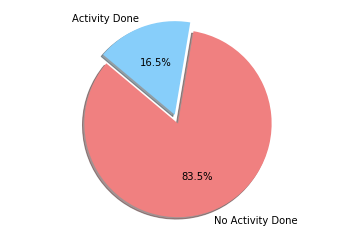

In [60]:
import matplotlib.pyplot as plt
from pylab import figure, axes, pie, title, show

# Data to plot
labels = 'No Activity Done', 'Activity Done'
sizes = [636, 126]
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.savefig('Activity_Pie.png')
plt.show()

In [61]:
neg_tweets_USA.groupby('Alert_Status').user_id.nunique()

Alert_Status
N    728
Y    24 
Name: user_id, dtype: int64

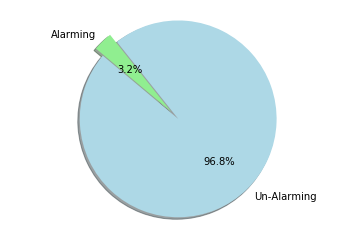

In [62]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Un-Alarming', 'Alarming'
sizes = [728, 24]
colors = ['lightblue', 'lightgreen']

explode = (0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)

# plt.legend(patches, labels, loc="best")

plt.axis('equal')
plt.savefig('Alert_Pie.png')
plt.show()

In [63]:
neg_tweets_USA.groupby('Severity_index').user_id.nunique()

Severity_index
Highly Severe    1  
Medium Severe    29 
Severe           723
Name: user_id, dtype: int64

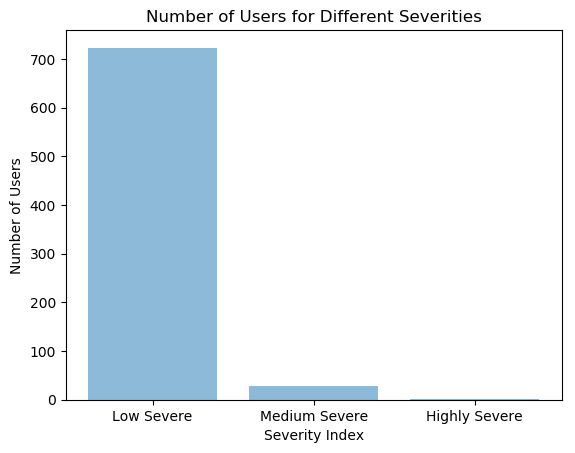

In [64]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
# objects = ('Highly Severe', 'Medium Severe', 'Low Severe')
objects = ('Low Severe', 'Medium Severe', 'Highly Severe')
y_pos = np.arange(len(objects))
# performance = [1,29,723]
performance = [723,29,1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Users')
plt.xlabel('Severity Index')
plt.title('Number of Users for Different Severities')
# plt.axis('auto')
plt.savefig('Severity_Bar.png')
plt.show()

In [65]:
neg_tweets_USA.groupby('Severity_index').user_followers_count.mean()

Severity_index
Highly Severe    2631.00000000000000000
Medium Severe    2103.86666666666678793
Severe           2051.93161290322586865
Name: user_followers_count, dtype: float64

In [66]:
neg_tweets_USA[neg_tweets_USA['Severity_index'] == 'Highly Severe']

,created_at,tweet_id_OLD,user_id_OLD,user_name_OLD,user_screen_name,user_location_name,user_description,user_verified,user_followers_count,user_friends_count,...,user_id,Score,Severity_index,Lat,Long,Name_Match_Tweets,Criminal_data_match,Criminal_data_ratio,Activity_Status,Alert_Status
646,Mon Apr 16 05:52:10 +0000 2018,2304005221.0,2304005221.0,De Morgen Cult.,cult,NaN,Cult. is de cultuurrubriek van @demorgen.,False,2631,2026,...,38205,-3.0,Highly Severe,51.08374599999999788,"3.714562,",NaN,Jacob Peters Newark,59.0,N,Y


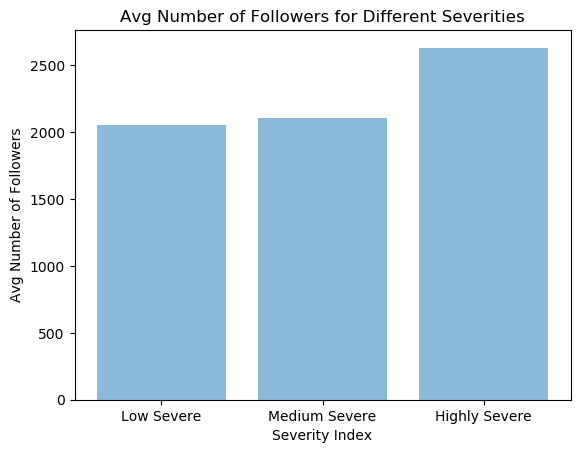

In [67]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
# objects = ('Highly Severe', 'Medium Severe', 'Low Severe')
objects = ('Low Severe', 'Medium Severe', 'Highly Severe')
y_pos = np.arange(len(objects))
# performance = [2631,2104,2052]
performance = [2052,2104,2631]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Avg Number of Followers')
plt.xlabel('Severity Index')
plt.title('Avg Number of Followers for Different Severities')
# plt.axis('auto')
plt.savefig('Avg_Follower_Severity_Bar.png')
plt.show()